imagen del EDA

In [36]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

In [37]:
ruta_archivo = r'C:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\EDA_Entrega\src\data\banco_espana\inversion_extranjera_bruta.xlsx'

# Cargar el archivo en un DataFrame saltando las primeras 5 filas
df = pd.read_excel(ruta_archivo, index_col=0)

df

,2022,2013,2014,1997,1998,1995,1994,1996,2001,2002,...,2012,2015,2016,2017,2018,2019,1999,2000,2020,2021
"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",45826.19,72307.39,420148.38,53059.71,34655.67,102295.15,46949.38,55206.57,51061.39,35435.50,...,31490.37,520392.38,336452.89,312274.61,201663.34,86462.07,70756.89,67817.86,181772.42,293429.35
02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,22178.03,49.84,3.00,2640.95,2710.46,206.72,566.56,486.52,781.62,442.11,...,56.10,17737.87,0.00,1205.70,12.40,2900.36,12.02,1163.88,2492.09,1083.90
03 PESCA Y ACUICULTURA,712.49,178.31,3678.15,233.25,2701.14,5534.66,6225.20,4694.31,1627.31,2802.52,...,45085.63,1064.10,37699.84,3023.55,32859.10,176103.57,1504.69,1688.18,1165.67,756.00
"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,330.56,6.00,116.77,NaN,961.62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.70,132.22,NaN,NaN
06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,3.00,7792.52,883253.53,24.49,509.20,364.75,0.00,132.22,169.49,70.01,...,113560.36,554.44,2838.38,772276.90,1899.41,1979.08,3176.35,30.05,7247.95,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",12.85,0.00,13.43,23366.24,11.00,427.86,1513.90,17657.63,20412.82,11159.68,...,12.00,16.60,7.25,136.05,3358.73,27.58,34364.13,57211.32,3.30,9.00
96 OTROS SERVICIOS PERSONALES,1259.80,463.75,258972.80,6287.02,72276.71,2356.72,2864.22,1005.84,11563.80,13135.23,...,7550.38,40589.54,17496.89,164119.44,81207.24,69048.85,20326.70,77844.35,15107.74,39458.39
97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,NaN,0.00,1.50,NaN,NaN,NaN,NaN,NaN,601.01,NaN,...,0.00,0.00,0.00,3.00,3.05,0.00,3.00,NaN,1696.68,3.00
98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.fillna(0, inplace=True)

In [39]:
df_nottransposed = df
df_transposed = df.T
df = df_transposed

In [40]:
# Convertir los índices (en este caso, los años) a strings
df.index = df.index.astype(str)

# Ordenar el DataFrame por los índices (años) de forma ascendente
df = df.sort_index()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1994 to 2022
Data columns (total 89 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS     29 non-null     float64
 1   02 SILVICULTURA Y EXPLOTACIÓN FORESTAL                   29 non-null     float64
 2   03 PESCA Y ACUICULTURA                                   29 non-null     float64
 3   05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO              29 non-null     float64
 4   06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL         29 non-null     float64
 5   07 EXTRACCIÓN DE MINERALES METÁLICOS                     29 non-null     float64
 6   08 OTRAS INDUSTRIAS EXTRACTIVAS                          29 non-null     float64
 7   09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS     29 non-null     float64
 8   10 INDUSTRIA DE LA ALIMENTACIÓN 

**Dataset:**  
df
 
**Descripción:**  
Datos sobre la inversión extranjera directa (IED) en España, expresada   

**Periodo:**  
1994 - 2022

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS|Nos indica la IED destinada a este sector|Numérica contínua|2|||
|...|...|...|...|...|...|
|99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATERRITORIAL|Nos indica la IED destinada a este sector|Numérica contínua|2|||
|total|Nos indica la IED por año|Numérica contínua|1|||


In [44]:
# Convertir todas las columnas (excepto el índice) a tipo float
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Sumar solo las columnas que son de tipo float y guardar el resultado en una nueva columna llamada 'Suma'
df['total'] = df.iloc[:, 1:].sum(axis=1)

df_total = df[['total']].copy()
df_total

,total
1994,6418889.80
1995,5329764.85
1996,5542089.73
1997,5712581.52
1998,8931718.00
1999,11422865.96
2000,26028859.43
2001,15504639.80
2002,11596931.46
2003,9821659.82


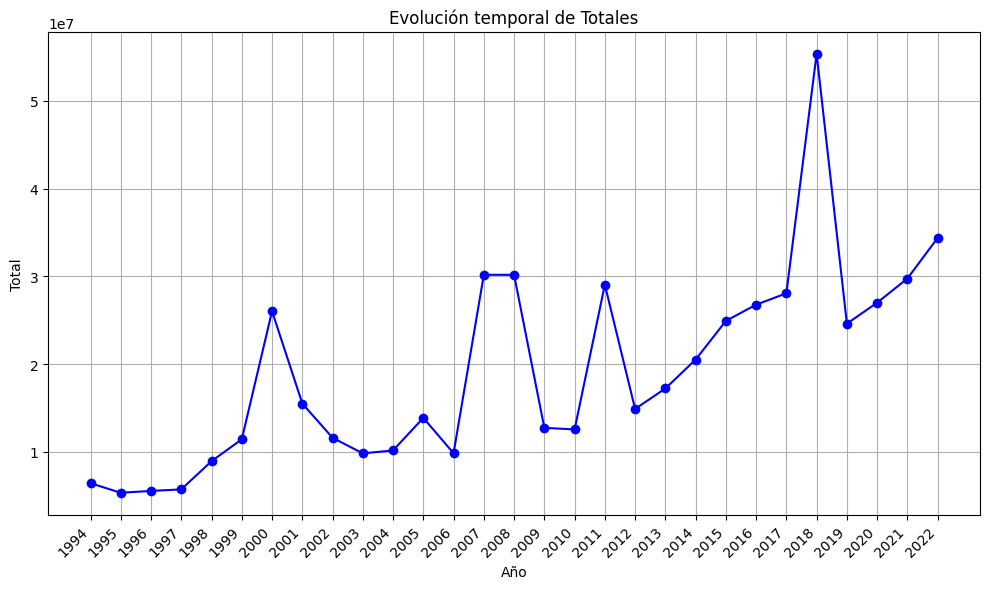

In [49]:
# Crear el gráfico temporal con los ticks del eje x en diagonal
plt.figure(figsize=(10, 6))
plt.plot(df_total.index, df_total['total'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Evolución temporal de Totales')
plt.grid(True)

# Rotar los ticks del eje x en diagonal
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [48]:
df_total['variacion_porcentual'] = df_total['total'].pct_change() * 100
df_total['variacion_porcentual'] = df_total['variacion_porcentual'].round(2)
df_total

,total,variacion_porcentual
1994,6418889.80,NaN
1995,5329764.85,-16.97
1996,5542089.73,3.98
1997,5712581.52,3.08
1998,8931718.00,56.35
1999,11422865.96,27.89
2000,26028859.43,127.87
2001,15504639.80,-40.43
2002,11596931.46,-25.20
2003,9821659.82,-15.31


In [51]:
df_nottransposed

,2022,2013,2014,1997,1998,1995,1994,1996,2001,2002,...,2012,2015,2016,2017,2018,2019,1999,2000,2020,2021
"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",45826.19,72307.39,420148.38,53059.71,34655.67,102295.15,46949.38,55206.57,51061.39,35435.50,...,31490.37,520392.38,336452.89,312274.61,201663.34,86462.07,70756.89,67817.86,181772.42,293429.35
02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,22178.03,49.84,3.00,2640.95,2710.46,206.72,566.56,486.52,781.62,442.11,...,56.10,17737.87,0.00,1205.70,12.40,2900.36,12.02,1163.88,2492.09,1083.90
03 PESCA Y ACUICULTURA,712.49,178.31,3678.15,233.25,2701.14,5534.66,6225.20,4694.31,1627.31,2802.52,...,45085.63,1064.10,37699.84,3023.55,32859.10,176103.57,1504.69,1688.18,1165.67,756.00
"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",0.00,0.00,0.00,330.56,6.00,116.77,0.00,961.62,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.70,132.22,0.00,0.00
06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,3.00,7792.52,883253.53,24.49,509.20,364.75,0.00,132.22,169.49,70.01,...,113560.36,554.44,2838.38,772276.90,1899.41,1979.08,3176.35,30.05,7247.95,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",12.85,0.00,13.43,23366.24,11.00,427.86,1513.90,17657.63,20412.82,11159.68,...,12.00,16.60,7.25,136.05,3358.73,27.58,34364.13,57211.32,3.30,9.00
96 OTROS SERVICIOS PERSONALES,1259.80,463.75,258972.80,6287.02,72276.71,2356.72,2864.22,1005.84,11563.80,13135.23,...,7550.38,40589.54,17496.89,164119.44,81207.24,69048.85,20326.70,77844.35,15107.74,39458.39
97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,0.00,0.00,1.50,0.00,0.00,0.00,0.00,0.00,601.01,0.00,...,0.00,0.00,0.00,3.00,3.05,0.00,3.00,0.00,1696.68,3.00
98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,400.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [56]:
categorias = {
    'AGRICULTURA, PESCA, GANADERÍA': ['01', '03', '02'],
    'FINANZAS/SEGUROS/ASESORIAS': ['64', '41', '65', '66', '62', '55', '73', '58', '70', '56', '71', '82', '69', '63', '81', '74', '96', '39', '80', '88', '84'],
    'MAQUINARIA E INDUSTRIA': ['10', '23', '24', '29', '27', '28', '17', '30', '22', '25', '11', '45', '26', '16', '12', '31', '33', '32', '15', '95'],
    'OTROS': ['59', '60', '85', '92', '78', '18', '53', '90', '91', '94', '75', '97', '98'],
    'REAL STATE/HOSPITALITY/ENTERTAINMENT': ['68', '93', '86', '77', '79'],
    'RETAIL/COMERCIO': ['46', '47', '72', '13', '14'],
    'SECTOR ENERGÉTICO/EXTRACTIVO': ['35', '19', '36', '38', '06', '08', '07', '87', '09', '37', '05', '99'],
    'SECTOR FARMACÉUTICO': ['21'],
    'SECTOR QUÍMICO': ['20'],
    'TELECOMUNICACIONES': ['61'],
    'TRANSPORTE E INFRAESTRUCTURAS': ['52', '51', '43', '42', '49', '50']
}


In [57]:
# Función para asignar la categoría basada en los dos primeros dígitos del índice
def asignar_categoria(dos_digitos):
    dos_digitos_str = str(dos_digitos)
    for categoria, digitos in categorias.items():
        if dos_digitos_str in digitos:
            return categoria
    return 'NO ASIGNADO'  # O cualquier valor que quieras asignar si no hay coincidencia

# Aplicar la función a los dos primeros dígitos del índice para crear una nueva columna 'categoria'
df_nottransposed['categoria'] = df_nottransposed.index.map(lambda x: asignar_categoria(x[:2]))

df_nottransposed

,2022,2013,2014,1997,1998,1995,1994,1996,2001,2002,...,2015,2016,2017,2018,2019,1999,2000,2020,2021,categoria
"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",45826.19,72307.39,420148.38,53059.71,34655.67,102295.15,46949.38,55206.57,51061.39,35435.50,...,520392.38,336452.89,312274.61,201663.34,86462.07,70756.89,67817.86,181772.42,293429.35,"AGRICULTURA, PESCA, GANADERÍA"
02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,22178.03,49.84,3.00,2640.95,2710.46,206.72,566.56,486.52,781.62,442.11,...,17737.87,0.00,1205.70,12.40,2900.36,12.02,1163.88,2492.09,1083.90,"AGRICULTURA, PESCA, GANADERÍA"
03 PESCA Y ACUICULTURA,712.49,178.31,3678.15,233.25,2701.14,5534.66,6225.20,4694.31,1627.31,2802.52,...,1064.10,37699.84,3023.55,32859.10,176103.57,1504.69,1688.18,1165.67,756.00,"AGRICULTURA, PESCA, GANADERÍA"
"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",0.00,0.00,0.00,330.56,6.00,116.77,0.00,961.62,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.70,132.22,0.00,0.00,SECTOR ENERGÉTICO/EXTRACTIVO
06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,3.00,7792.52,883253.53,24.49,509.20,364.75,0.00,132.22,169.49,70.01,...,554.44,2838.38,772276.90,1899.41,1979.08,3176.35,30.05,7247.95,3.00,SECTOR ENERGÉTICO/EXTRACTIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",12.85,0.00,13.43,23366.24,11.00,427.86,1513.90,17657.63,20412.82,11159.68,...,16.60,7.25,136.05,3358.73,27.58,34364.13,57211.32,3.30,9.00,MAQUINARIA E INDUSTRIA
96 OTROS SERVICIOS PERSONALES,1259.80,463.75,258972.80,6287.02,72276.71,2356.72,2864.22,1005.84,11563.80,13135.23,...,40589.54,17496.89,164119.44,81207.24,69048.85,20326.70,77844.35,15107.74,39458.39,FINANZAS/SEGUROS/ASESORIAS
97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,0.00,0.00,1.50,0.00,0.00,0.00,0.00,0.00,601.01,0.00,...,0.00,0.00,3.00,3.05,0.00,3.00,0.00,1696.68,3.00,OTROS
98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,400.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,OTROS


In [64]:
# Agrupar por la columna 'categoria' y eliminar el índice
grupo_por_categoria = df_nottransposed.groupby('categoria').sum().reset_index()

# Obtener la lista de columnas ordenadas de menor a mayor 
columnas_ordenadas = grupo_por_categoria.columns[1:].astype(int).sort_values().astype(str).tolist()

# Reorganizar el DataFrame con las columnas ordenadas
grupo_por_categoria = grupo_por_categoria[['categoria'] + columnas_ordenadas]

grupo_por_categoria


,categoria,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"AGRICULTURA, PESCA, GANADERÍA",53741.14,108036.53,60387.40,55933.91,40067.27,72273.60,70669.92,53470.32,38680.13,...,72535.54,423829.53,539194.35,374152.73,316503.86,234534.84,265466.00,185430.18,295269.25,68716.71
1,FINANZAS/SEGUROS/ASESORIAS,1660427.25,1338240.83,1329127.43,1095317.55,3427229.53,4314517.13,5801328.33,4204758.56,3821630.96,...,5651152.25,6199714.84,7504423.26,7389326.60,5959508.85,11111195.06,9771597.47,14084490.25,5996308.76,5981707.03
2,MAQUINARIA E INDUSTRIA,2699289.10,870601.20,2008794.32,1815560.61,2411715.77,2492406.92,1598376.59,6236148.57,1384622.02,...,2030334.13,1614207.08,3134350.08,5196557.96,4144900.20,4694027.95,4024836.90,3239253.60,3671827.93,10122803.45
3,OTROS,81305.33,92216.27,203401.02,87444.69,185378.93,394533.72,875119.24,449177.62,172823.35,...,321318.11,153611.83,1175291.10,840836.63,126501.46,1963974.99,933683.13,340062.48,540664.99,1364557.30
4,REAL STATE/HOSPITALITY/ENTERTAINMENT,464677.50,298523.97,348189.74,407873.63,697249.12,569125.65,922392.23,788007.03,1028374.72,...,3060239.81,3550521.38,4809346.18,3450999.61,4706131.80,5267207.74,3265304.82,1914200.22,2174936.97,5293996.92
5,RETAIL/COMERCIO,858709.24,811916.58,894846.35,1097240.19,1088927.18,729619.17,1245393.87,1102161.85,699355.01,...,988770.44,3897018.89,3177430.01,1584403.85,2515364.53,4669857.80,1825744.62,1500948.83,2563874.82,2592106.79
6,SECTOR ENERGÉTICO/EXTRACTIVO,89169.70,256403.04,111562.48,83565.99,185386.64,693619.42,46234.61,600091.73,1731178.95,...,1867004.77,2589996.58,3314403.81,5656260.05,4342436.80,4048245.19,1716514.96,1414229.91,6812135.79,4322798.46
7,SECTOR FARMACÉUTICO,168897.68,67394.29,108352.54,63510.11,47865.97,95878.62,30583.10,84477.67,20711.29,...,790930.00,234392.30,132712.29,85238.60,216287.06,107339.83,158908.74,44432.31,73973.84,155155.55
8,SECTOR QUÍMICO,272218.50,1331830.75,175500.91,104137.91,382945.29,969328.68,611282.01,191280.49,183682.61,...,73637.89,483759.75,219253.14,307873.25,318829.81,3214269.77,1148447.04,396190.30,308770.13,107055.96
9,TELECOMUNICACIONES,34742.18,126502.60,197526.52,869221.47,396894.38,623177.34,14465838.20,1694773.24,1704454.32,...,392151.30,348990.86,117848.90,52120.55,1571930.70,2482338.26,786338.44,2237454.20,1351551.15,2713428.22


In [66]:
grupo_por_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   categoria  11 non-null     object 
 1   1994       11 non-null     float64
 2   1995       11 non-null     float64
 3   1996       11 non-null     float64
 4   1997       11 non-null     float64
 5   1998       11 non-null     float64
 6   1999       11 non-null     float64
 7   2000       11 non-null     float64
 8   2001       11 non-null     float64
 9   2002       11 non-null     float64
 10  2003       11 non-null     float64
 11  2004       11 non-null     float64
 12  2005       11 non-null     float64
 13  2006       11 non-null     float64
 14  2007       11 non-null     float64
 15  2008       11 non-null     float64
 16  2009       11 non-null     float64
 17  2010       11 non-null     float64
 18  2011       11 non-null     float64
 19  2012       11 non-null     float64
 20  2013       1

In [68]:
# Eliminar la columna 'categoria' temporalmente para calcular la suma por fila
grupo_sin_categoria = grupo_por_categoria.drop(columns='categoria')

# Calcular la suma de todas las columnas (años) por fila
total_por_fila = grupo_sin_categoria.sum(axis=1)

# Agregar la columna de totales al DataFrame original
grupo_por_categoria['Total'] = total_por_fila

grupo_por_categoria


,categoria,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,"AGRICULTURA, PESCA, GANADERÍA",53741.14,108036.53,60387.40,55933.91,40067.27,72273.60,70669.92,53470.32,38680.13,...,423829.53,539194.35,374152.73,316503.86,234534.84,265466.00,185430.18,295269.25,68716.71,7.824334e+06
1,FINANZAS/SEGUROS/ASESORIAS,1660427.25,1338240.83,1329127.43,1095317.55,3427229.53,4314517.13,5801328.33,4204758.56,3821630.96,...,6199714.84,7504423.26,7389326.60,5959508.85,11111195.06,9771597.47,14084490.25,5996308.76,5981707.03,2.833777e+08
2,MAQUINARIA E INDUSTRIA,2699289.10,870601.20,2008794.32,1815560.61,2411715.77,2492406.92,1598376.59,6236148.57,1384622.02,...,1614207.08,3134350.08,5196557.96,4144900.20,4694027.95,4024836.90,3239253.60,3671827.93,10122803.45,1.682071e+08
3,OTROS,81305.33,92216.27,203401.02,87444.69,185378.93,394533.72,875119.24,449177.62,172823.35,...,153611.83,1175291.10,840836.63,126501.46,1963974.99,933683.13,340062.48,540664.99,1364557.30,2.684889e+07
4,REAL STATE/HOSPITALITY/ENTERTAINMENT,464677.50,298523.97,348189.74,407873.63,697249.12,569125.65,922392.23,788007.03,1028374.72,...,3550521.38,4809346.18,3450999.61,4706131.80,5267207.74,3265304.82,1914200.22,2174936.97,5293996.92,1.129448e+08
5,RETAIL/COMERCIO,858709.24,811916.58,894846.35,1097240.19,1088927.18,729619.17,1245393.87,1102161.85,699355.01,...,3897018.89,3177430.01,1584403.85,2515364.53,4669857.80,1825744.62,1500948.83,2563874.82,2592106.79,1.151460e+08
6,SECTOR ENERGÉTICO/EXTRACTIVO,89169.70,256403.04,111562.48,83565.99,185386.64,693619.42,46234.61,600091.73,1731178.95,...,2589996.58,3314403.81,5656260.05,4342436.80,4048245.19,1716514.96,1414229.91,6812135.79,4322798.46,1.628137e+08
7,SECTOR FARMACÉUTICO,168897.68,67394.29,108352.54,63510.11,47865.97,95878.62,30583.10,84477.67,20711.29,...,234392.30,132712.29,85238.60,216287.06,107339.83,158908.74,44432.31,73973.84,155155.55,8.448379e+06
8,SECTOR QUÍMICO,272218.50,1331830.75,175500.91,104137.91,382945.29,969328.68,611282.01,191280.49,183682.61,...,483759.75,219253.14,307873.25,318829.81,3214269.77,1148447.04,396190.30,308770.13,107055.96,3.214422e+07
9,TELECOMUNICACIONES,34742.18,126502.60,197526.52,869221.47,396894.38,623177.34,14465838.20,1694773.24,1704454.32,...,348990.86,117848.90,52120.55,1571930.70,2482338.26,786338.44,2237454.20,1351551.15,2713428.22,9.946763e+07


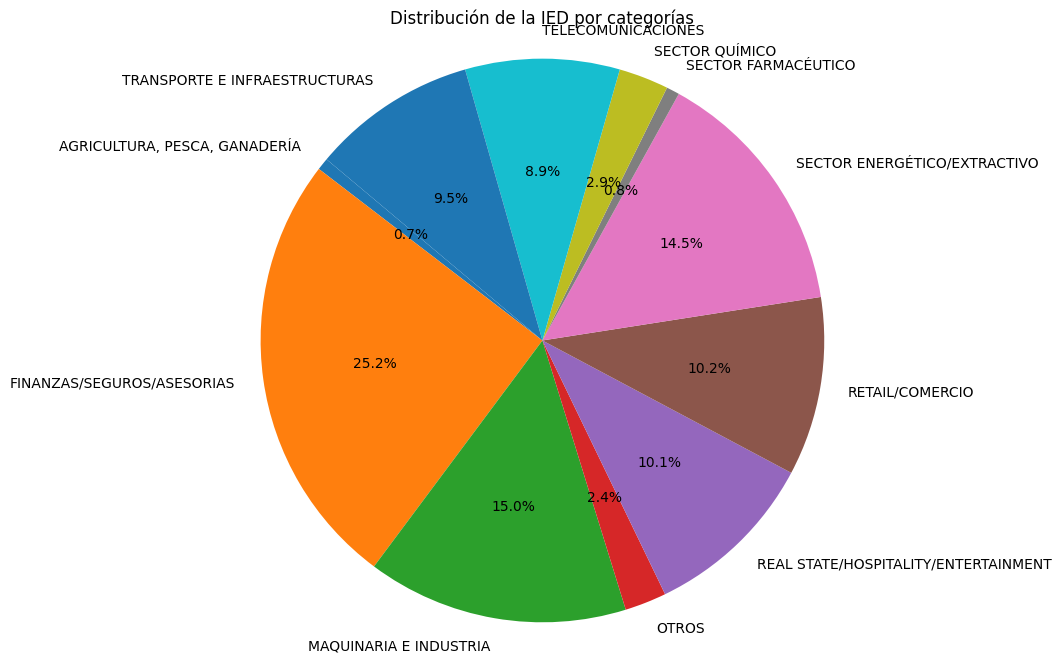

In [70]:
# Gráfico circular con la columna 'categoria' y 'Total'
plt.figure(figsize=(8, 8))
plt.pie(grupo_por_categoria['Total'], labels=grupo_por_categoria['categoria'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.title('Distribución de la IED por categorías')
plt.show()

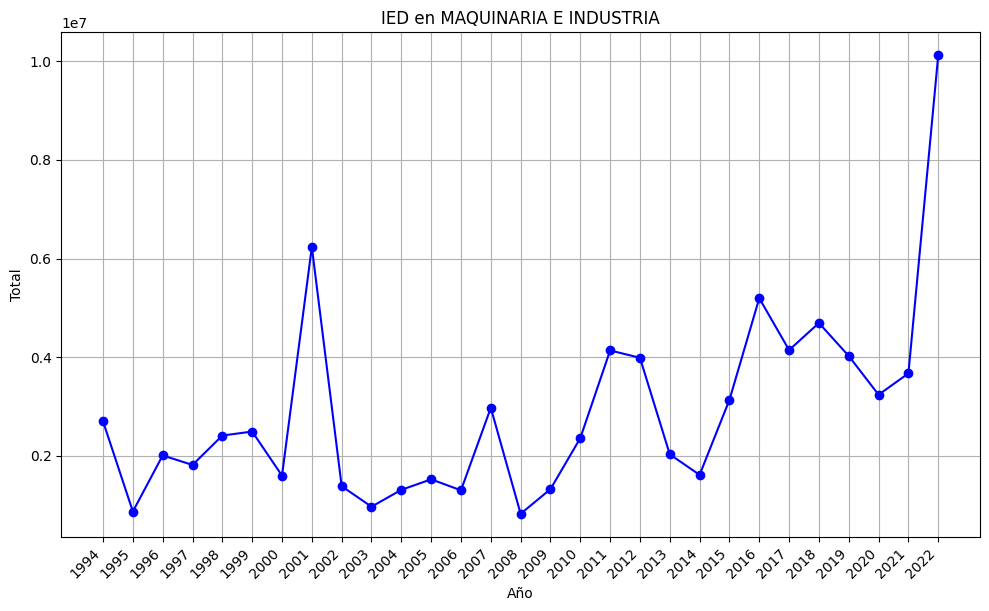

In [73]:
# Filtrar el DataFrame por la categoría 'MAQUINARIA E INDUSTRIA'
categoria_seleccionada = grupo_por_categoria[grupo_por_categoria['categoria'] == 'MAQUINARIA E INDUSTRIA']

# Obtener las columnas de años (1994-2022)
columnas_años = grupo_por_categoria.columns[1:-1]

# Obtener los valores para la categoría 'MAQUINARIA E INDUSTRIA'
valores_categoria = categoria_seleccionada[columnas_años].values.flatten()

# Crear un gráfico de línea para la evolución temporal
plt.figure(figsize=(10, 6))
plt.plot(columnas_años, valores_categoria, marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('IED en MAQUINARIA E INDUSTRIA')
plt.grid(True)
plt.tight_layout()

# Rotar los ticks del eje x en diagonal
plt.xticks(rotation=45, ha='right')

plt.show()


In [78]:
# Filtrar el DataFrame por la categoría 'MAQUINARIA E INDUSTRIA' y eliminar la columna 'categoria'
fila_maquinaria = grupo_por_categoria[grupo_por_categoria['categoria'] == 'MAQUINARIA E INDUSTRIA'].drop(columns='categoria')

# Transponer la fila de la categoría 'MAQUINARIA E INDUSTRIA'
fila_maquinaria = fila_maquinaria.T.reset_index()

# Renombrar las columnas
fila_maquinaria.columns = ['Año', 'Valor']

# Convertir la columna 'Valor' a tipo numérico (float) excluyendo el primer elemento (nombre de la fila)
fila_maquinaria['Valor'] = fila_maquinaria['Valor'].astype(float, errors='ignore')

# Calcular las variaciones porcentuales respecto al año anterior
fila_maquinaria['Variación %'] = fila_maquinaria['Valor'].pct_change() * 100

fila_maquinaria


,Año,Valor,Variación %
0,1994,2.699289e+06,NaN
1,1995,8.706012e+05,-67.747019
2,1996,2.008794e+06,130.736452
3,1997,1.815561e+06,-9.619388
4,1998,2.411716e+06,32.835872
5,1999,2.492407e+06,3.345798
6,2000,1.598377e+06,-35.870159
7,2001,6.236149e+06,290.155149
8,2002,1.384622e+06,-77.796840
9,2003,9.687405e+05,-30.035744
